# The Spark Foundation and GRIP Task


# Author : Diksha Babhulkar

<big>Task 7: Stock Market Prediction using Numerical and Textual Analysis

Objective: Create a hybrid model for stock price/performance 
prediction using numerical analysis of historical stock prices, and 
sentimental analysis of news headlines 
    
* Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
</big>

In [1]:
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df=dr.data.get_data_yahoo('TATASTEEL.NS',start='2016-04-15',end='2021-04-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,321.310425,312.164154,316.213287,319.690765,7549816.0,286.675140
2016-04-20,342.318268,321.739166,321.977356,340.555725,19294099.0,305.385284
2016-04-21,346.843781,336.411316,341.841919,337.792786,10864121.0,302.907715
2016-04-22,346.557953,335.649109,341.079712,336.935303,12695922.0,302.138794
2016-04-25,336.982941,328.265411,335.839661,331.028351,6465189.0,296.841888
...,...,...,...,...,...,...
2021-04-08,953.650024,882.700012,884.000000,918.400024,53063056.0,918.400024
2021-04-09,930.000000,885.700012,921.000000,899.500000,32179069.0,899.500000
2021-04-12,893.200012,843.349976,876.549988,851.549988,22135504.0,851.549988


In [3]:
df.shape

(1232, 6)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,321.310425,312.164154,316.213287,319.690765,7549816.0,286.675140
2016-04-20,342.318268,321.739166,321.977356,340.555725,19294099.0,305.385284
2016-04-21,346.843781,336.411316,341.841919,337.792786,10864121.0,302.907715
2016-04-22,346.557953,335.649109,341.079712,336.935303,12695922.0,302.138794
2016-04-25,336.982941,328.265411,335.839661,331.028351,6465189.0,296.841888


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-08,953.650024,882.700012,884.000000,918.400024,53063056.0,918.400024
2021-04-09,930.000000,885.700012,921.000000,899.500000,32179069.0,899.500000
2021-04-12,893.200012,843.349976,876.549988,851.549988,22135504.0,851.549988
2021-04-13,881.599976,849.000000,862.000000,879.000000,20428502.0,879.000000
2021-04-15,911.500000,879.500000,892.000000,898.200012,21847549.0,898.200012


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2016-04-18 to 2021-04-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1232 non-null   float64
 1   Low        1232 non-null   float64
 2   Open       1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Volume     1232 non-null   float64
 5   Adj Close  1232 non-null   float64
dtypes: float64(6)
memory usage: 67.4 KB


In [7]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

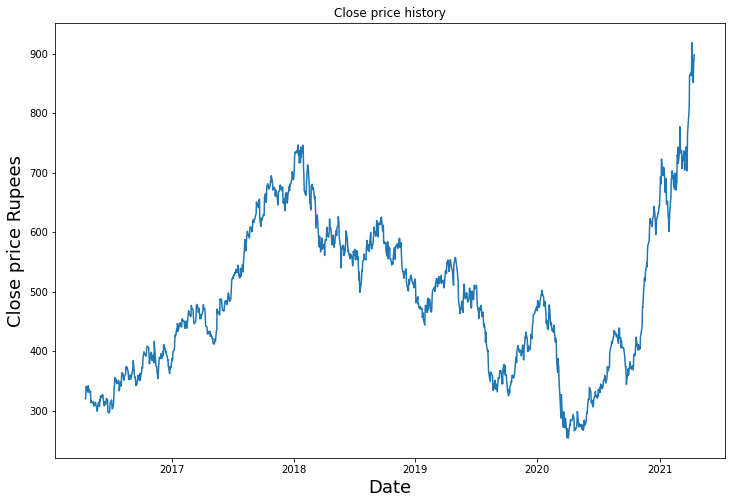

In [8]:
plt.figure(figsize=(12,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price Rupees',fontsize=18)
plt.show()

In [9]:
data=df.filter(['Close'])
df_1=data.values
len(df_1)

1232

In [10]:
import math

In [11]:
train_size=math.ceil(len(df_1)*.7)
train_size

863

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(df_1)
scaled

array([[0.09921126],
       [0.13060366],
       [0.12644668],
       ...,
       [0.8994207 ],
       [0.94072065],
       [0.96960805]])

In [13]:
train_data=scaled[0:train_size,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
	x_train.append(train_data[i-60:i,0])
	y_train.append(train_data[i,0])

	if i<=61:
		print(x_train)
		print(y_train)

[array([0.09921126, 0.13060366, 0.12644668, 0.12515655, 0.11626924,
       0.13225211, 0.12960023, 0.11648426, 0.12150128, 0.1155525 ,
       0.11834773, 0.08946386, 0.09383587, 0.09025227, 0.08939219,
       0.08846048, 0.09096901, 0.09211574, 0.0807199 , 0.08609529,
       0.0871704 , 0.0898939 , 0.08588027, 0.0807199 , 0.06767556,
       0.07362434, 0.08351508, 0.08437517, 0.09068232, 0.08028986,
       0.09749114, 0.09433758, 0.10652184, 0.10351159, 0.1025082 ,
       0.10931702, 0.10774025, 0.10852866, 0.09756281, 0.08136492,
       0.0840168 , 0.09161403, 0.0919724 , 0.08473353, 0.10021469,
       0.09706114, 0.09476763, 0.09691779, 0.06638548, 0.0633036 ,
       0.06473703, 0.06774723, 0.07971647, 0.08853215, 0.0930475 ,
       0.09648775, 0.07362434, 0.0745561 , 0.08695537, 0.10888703])]
[0.13103365533398487]
[array([0.09921126, 0.13060366, 0.12644668, 0.12515655, 0.11626924,
       0.13225211, 0.12960023, 0.11648426, 0.12150128, 0.1155525 ,
       0.11834773, 0.08946386, 0.093

In [14]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(803, 60, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

803/803 [==============================] - 25s 27ms/step - loss: 0.0055


In [19]:
test_data=scaled[train_size-60:,:]
x_test=[]
y_test=df_1[train_size:,:]
for i in range(60,len(test_data)):
	x_test.append(test_data[i-60:i,0])

In [20]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

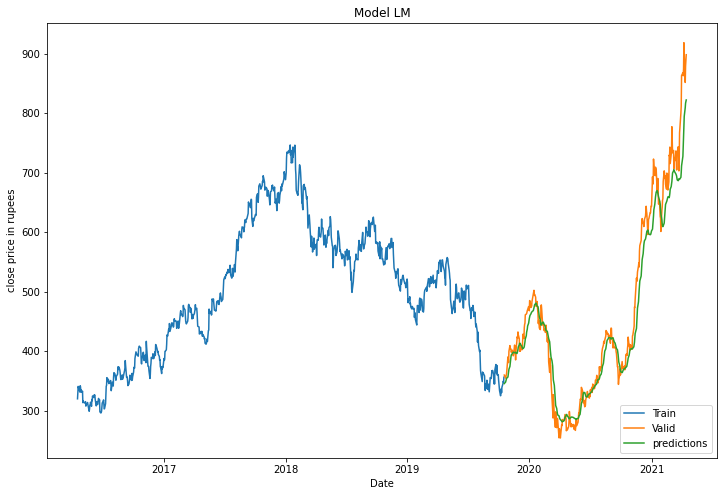

In [22]:
train=data[:train_size]
valid=data[train_size:]
valid['predictions']=prediction
plt.figure(figsize=(12,8))
plt.title('Model LM')
plt.xlabel('Date')
plt.ylabel('close price in rupees')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'],loc='lower right')
plt.show()

In [23]:
valid

,Close,predictions
Date,,
2019-10-18,359.600006,345.302917
2019-10-22,354.500000,347.772217
2019-10-23,356.200012,350.053284
2019-10-24,359.899994,352.147949
2019-10-25,362.250000,354.232086
...,...,...
2021-04-08,918.400024,777.603577
2021-04-09,899.500000,794.666443
2021-04-12,851.549988,809.179443


# Sentiment Analysis

In [24]:
raw=pd.read_csv('india-news-headlines.csv')
raw.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [25]:
raw.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [26]:
raw_df=raw[['headline_text']].copy()
raw_df

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic
...,...
3424062,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,Govt extends deadline for use of FASTag till F...


In [27]:
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [28]:
raw_df.isnull().sum()

headline_text    0
dtype: int64

In [29]:
raw_df=raw_df.iloc[:15000,:]
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [30]:
raw_df.shape

(15000, 1)

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [32]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
sid=SentimentIntensityAnalyzer()
result=[]
for line in raw_df['headline_text']:
	scores=sid.polarity_scores(line)
	scores['headline']=line
	result.append(scores)
rev=pd.DataFrame(result)
rev.head()

,neg,neu,pos,compound,headline
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic


In [34]:
rev.shape

(15000, 5)

In [35]:
ratings=[]
for row in rev['compound']:
  if row >= 0.05 :
      ratings.append(1)
  elif row <= - 0.05 :
    ratings.append(-1)
  else :
    ratings.append(0)

rev['scores']=ratings
rev.head()

,neg,neu,pos,compound,headline,scores
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic,1


In [36]:
rev['scores'].value_counts()

 0    8145
-1    3883
 1    2972
Name: scores, dtype: int64

In [37]:
a=rev['scores'].value_counts(normalize=True)*100
a

 0    54.300000
-1    25.886667
 1    19.813333
Name: scores, dtype: float64

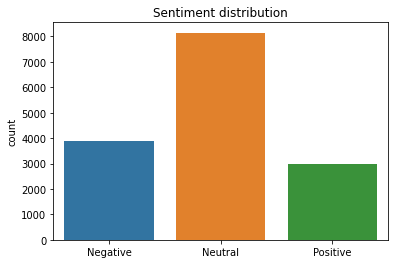

In [39]:
import seaborn as sns
f = sns.countplot(x='scores', data=rev)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Neutral','Positive'])
plt.xlabel("");

<Figure size 864x576 with 0 Axes>

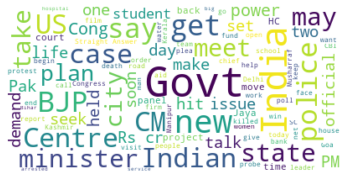

In [40]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
text = " ".join(review for review in rev.headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [44]:
z=rev['headline'].values.tolist()
z[0:5]

['Status quo will not be disturbed at Ayodhya; says Vajpayee',
 'Fissures in Hurriyat over Pak visit',
 "America's unwanted heading for India?",
 'For bigwigs; it is destination Goa',
 'Extra buses to clear tourist traffic']

In [52]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

In [53]:
def process_text(z):
    tokens = []
    for line in z:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [54]:
pos_lines = list(rev[rev.scores == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('govt', 125),
 ('straight', 94),
 ('answers', 86),
 ('india', 84),
 ('relief', 60),
 ('top', 59),
 ('security', 57),
 ('help', 53),
 ('rs', 49),
 ('peace', 48),
 ('best', 44),
 ('us', 44),
 ('good', 43),
 ('new', 43),
 ('support', 40),
 ('indian', 39),
 ('special', 39),
 ('cm', 38),
 ('centre', 38),
 ('party', 36)]

In [55]:
neg_lines = list(rev[rev.scores == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('govt', 162),
 ('killed', 148),
 ('police', 99),
 ('case', 89),
 ('death', 87),
 ('india', 81),
 ('murder', 71),
 ('strike', 66),
 ('dead', 66),
 ('arrested', 61),
 ('held', 60),
 ('bjp', 58),
 ('attack', 58),
 ('accused', 56),
 ('3', 55),
 ('phoolan', 55),
 ('protest', 54),
 ('says', 53),
 ('ban', 52),
 ('fire', 48)]